## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df=pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [3]:
#number of rows
df.shape[0]

294478

c. The number of unique users in the dataset.

In [4]:
#unique user_ids
df['user_id'].nunique()

290584

d. The proportion of users converted.

In [5]:
#proportion of users converted knowing
# it is a binary outcome
df.converted.mean()

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't line up.

In [6]:
#(new_page and control group) + (old_page and treatment group) 
df[((df.group == 'control') & (df.landing_page == 'new_page')) | (df.group == 'treatment') & (df.landing_page == 'old_page') ]['user_id'].count()


3893

f. Do any of the rows have missing values?

In [7]:
#check for null values by column
df.isnull().any() 

user_id         False
timestamp       False
group           False
landing_page    False
converted       False
dtype: bool

In [8]:
#shows that we don't have null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 7.9+ MB


`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [9]:
# only control group lined up with old_page and treatment group lined up with new_page  
df2 = df[((df.group == 'control') & (df.landing_page == 'old_page')) | ((df.group == 'treatment') & (df.landing_page == 'new_page'))]

In [10]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [11]:
#number of unique user ids
df2['user_id'].nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [12]:
# index and user_id of the duplicate 
df2.loc[df2.user_id.duplicated(), :]['user_id']

2893    773192
Name: user_id, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [13]:
df2[df2.user_id == 773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [14]:
#drop row with index 2893
df2.drop(2893, inplace = True)

c:\users\fbadr\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [15]:
#double check the correct row was removed
df2[df2.user_id == 773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0


`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [16]:
#converted probability
df2.converted.mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [17]:
#probability converted given that that the individual is from the control group
df2[(df2.group == 'control')].converted.mean()

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [18]:
#probability converted given that that the individual is from the treatment group
df2[(df2.group == 'treatment')].converted.mean()

0.11880806551510564

d. What is the probability that an individual received the new page?

In [19]:
#total number of individuals who received the 'new_page'
total_newpage = df2[df2.landing_page == 'new_page'].count()['user_id']
#total number of pages
total_pages = df2.shape[0]
#probability of an individual received the new page
total_newpage / total_pages #0.50006194422266881


0.50006194422266881

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

**based on the result obtained we cannot say that their sufficient evidence that the treatment leads to more conversion since the probabilty of conversion given that the individual is from the control group = 0.12 is a little bit greater than the probabilty of conversion given that that the individual is from the treatment group = 0.118, with 50% percent of individuals received the new page **

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**$$H_0 : p_{old} \ge p_{new} $$**
**$$H_1 : p_{old} \lt p_{new} $$**

can be re-arranged as:

**$$H_0 : p_{new} - p_{old} \leq 0 $$**
**$$H_1 : p_{new} - p_{old} > 0 $$**


`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [20]:
#converted p_new
p_new = df2.converted.mean()
p_new


0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [21]:
#converted p_new
p_old = df2.converted.mean()
p_old

0.11959708724499628

c. What is $n_{new}$?

In [22]:
#already computed in d.
n_new = df2[df2.landing_page == 'new_page'].count()['user_id']
n_new

145310

d. What is $n_{old}$?

In [23]:
#total_pages = df2.shape[0] computed  in d. 
n_old = total_pages - n_new
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [24]:
#using np.random.choice
#with random sample is [0,1]
#size equal to n_old
#probability associated with 1 (conversion) is given by p_new
#probability associated with 0 (no conversion) is given by 1-p_new
new_page_converted = np.random.choice(np.arange(2), size=n_new, p=[(1-p_new), p_new])

#Note that tried to use np.random.binomial, but it does not generate an array of 0 and 1
#without adding it to list comprehension, which takes a lot of time to compute
#new_page_converted = np.array([np.random.binomial(1,p=p_new) for i in range(n_new)])


f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [25]:
#using np.random.choice
#with random sample is [0,1]
#size equal to n_old
#probability associated with 1 (conversion) is given by p_old
#probability associated with 0 (no conversion) is given by 1-p_old
old_page_converted = np.random.choice(np.arange(2), size=n_old, p=[(1-p_old), p_old])




g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [26]:
#simuated p_old 
sim_p_old = old_page_converted.mean()
#simulated p_new
sim_p_new = new_page_converted.mean()

In [27]:
#pnew-pold almost zero
sim_p_new - sim_p_old

0.00019078753417894889

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [28]:
p_diffs= []
for _ in range(10000):
    #old simulated sample
    sample_old = np.random.choice(np.arange(2), size=n_old, p=[(1-p_old), p_old])
    #new simulated sample
    sample_new = np.random.choice(np.arange(2), size=n_new, p=[(1-p_new), p_new])
    sim_p_old = sample_old.mean()
    sim_p_new = sample_new.mean()
    p_diffs.append(sim_p_new - sim_p_old)
    

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

Text(0,0.5,'proportion difference frequency')

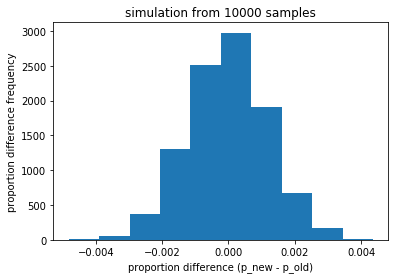

In [29]:
p_diffs=np.array(p_diffs)
plt.hist(p_diffs);
plt.title('simulation from 10000 samples')
plt.xlabel('proportion difference (p_new - p_old)')
plt.ylabel('proportion difference frequency')

**the plot looks like sampling distribution under the null hypothesis**

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [30]:
#obeserved difference 
obs_diff=df2[(df2.group == 'treatment')].converted.mean() - df2[(df2.group == 'control')].converted.mean()

#pdiff > obs diff proportions
(p_diffs > obs_diff).mean()

0.90459999999999996

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**We computed the probability of observing our statistic or one more extreme in favor of the Alternative hypothesis if our null hypothesis is true.<br>
In scientific studies this is called the 'p-value'.<br>
Since the computed p-value ~ 0.9 large with a level of significance alpha = 0.05. Thus we fail to reject the Null Hypothesis in favor of the Alternative. And this would suggest that proportion of converion with the old page is greater than the new page.**


l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [31]:
import statsmodels.api as sm

#number of conversion for old pages
convert_old = df2[df2.landing_page == 'old_page'].converted.sum()
#number of conversion for new pages
convert_new = df2[df2.landing_page == 'new_page'].converted.sum() 
#total number of old pages
n_old = df2[df2.landing_page == 'old_page'].count()['user_id']
#total number of new pages
n_new = df2[df2.landing_page == 'new_page'].count()['user_id']


c:\users\fbadr\appdata\local\programs\python\python36-32\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [32]:
# since pnew <= pold. Our Alternative Hypothesis is one sided 'smaller'
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative="smaller")
#zscore = 1.3109241984234394
#pvalue = 0.90505831275902449
z_score, p_value

(1.3109241984234394, 0.90505831275902449)

In [33]:
from scipy.stats import norm
# Tells us how significant our z-score is
print(norm.cdf(z_score)) # 0.905058312759

#Tells us what our critical value at 95% confidence is
print(norm.ppf(1-(0.05))) # 1.64485362695


0.905058312759
1.64485362695


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**From the z-score =1.31 and p-value=0.90 computed, we don't have evidence to reject the null hypothesis that the difference in the conversion rate of the new page is better than the conversion rate of the old page. <br>
Yes z-score and p-value computed do agree with the findings in parts j. and k.**


<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**We should be performing a Logistic Regression**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [34]:
#add the intercept
df2['intercept'] = 1
#used landing_page where ab_page is new_page
#which is 1 when individual receives the treatment and 0 if control
df2[['ab_page', 'old_page' ]] = pd.get_dummies(df2['landing_page'])


c:\users\fbadr\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\users\fbadr\appdata\local\programs\python\python36-32\lib\site-packages\pandas\core\frame.py:2450: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [35]:
#double check ab_page
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,old_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,1


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [36]:
#faced an error when trying to run the summary of fitted regression model
#AttributeError: module 'scipy.stats' has no attribute 'chisqprob'
#could be due the scipy library installed
# According to https://github.com/statsmodels/statsmodels/issues/3931
#the workaround for this specific issue with missing function chisqprob is
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

model = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
results = model.fit()



Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [37]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Sun, 11 Feb 2018   Pseudo R-squ.:               8.077e-06
Time:                        18:02:36   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

In [38]:
#ab_page coefficient interpretation
int_ab_page = 1/np.exp(-0.0150)
int_ab_page

1.0151130646157189

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

p-value associated with ab_page equal to '0.190'.<br>
It differs since in the regression model we are talking about a __two-tailed__ test while in Part II the simulation was done based on __one-tailed__ test.<br>
In our regression model, the hypothesis test for our explanatory variable ab_page is a test if that the population slope (coefficient attached to ab_page) is equal to zero vs the alternative where the parameter differs from zero. So the null and alternative hypotheses associated with the regression model can be represented by the below:        

 $$H_0 : p_{new} - p_{old} = 0$$
 $$H_1 : p_{new} - p_{old} \neq 0$$

In [39]:
#now getting the odds ratio by dividing the odds of conversion of the treatment group by 
# the odds of conversion of the control group, this value indicates a tiny difference 
#between p_new and p_old
OR = np.exp(-1.9888-0.0150) / np.exp(-1.9888)
print (OR)

0.985111939603


f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**It is good to consider other factors to add to the regression model, as the above test
might have produced a biased result due to factor like 'change Aversion', or maybe we did not take into account the different experiences of users based on whether they are testing from PC browser or mobile devices which could be a factor that influence the conversion also.<br>
or Maybe seggregating the conversion rate based on products types and taking this as a factore we might have come out with different results.<br>
disadvantages to adding additional terms into your regression model:<br>
-multicollinearity between explanatory variables which could affect the predictive model <br>
-the problem with adding a lot of terms is that you might not be able to accurately determine which of the variables made the difference.**


g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [40]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')


In [41]:
#getting total number of users by country
df_new['country'].value_counts()

US    203619
UK     72466
CA     14499
Name: country, dtype: int64

In [42]:
#checking if we have missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 7.9+ MB


In [43]:
#checking group treatment and control by country
df_new.groupby(['country', 'group'], as_index =False).count()[['country','group', 'landing_page']]

,country,group,landing_page
0,CA,control,7198
1,CA,treatment,7301
2,UK,control,36360
3,UK,treatment,36106
4,US,control,101716
5,US,treatment,101903


In [44]:
#Conversion rate by country
p_converted_ca = df_new[df_new.country == 'CA'].converted.mean()
p_converted_us = df_new[df_new.country == 'US'].converted.mean()
p_converted_uk = df_new[df_new.country == 'UK'].converted.mean()
 
print("CA: {0}, US: {1}, UK: {2}".format(p_converted_ca, p_converted_us, p_converted_uk))

CA: 0.11531829781364232, US: 0.1195468006423762, UK: 0.12059448568984076


In [45]:
### Create the necessary dummy variables
df_new[['CA', 'UK', 'US' ]] = pd.get_dummies(df_new['country'])
#instantiate the model by taking 'CA' and 'US' and adding intercept 
# in this case taking 'US' as the baseline
model2 = sm.Logit(df_new['converted'], df_new[['intercept', 'CA', 'UK']])
#fitting the model and outputing summary
model2.fit().summary()


Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Sun, 11 Feb 2018   Pseudo R-squ.:               1.521e-05
Time:                        18:02:37   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9967      0.007   -292.314      0.000      -2.010      -1.983
CA            -0.0408      0.027     -1.518      0.129      -0.093       0.012
UK             0.0099      0.013      0.746      0.456      -0.016       0.036
==============================================================================
"""

In [46]:
#interpreting coefficients
coef_uk = np.exp(0.0099)
coef_ca = np.exp(-0.0408)
print("UK: {0}, CA: {1}".format(coef_uk, coef_ca))

UK: 1.0099491671175422, CA: 0.9600211149716509


In [47]:
#reciprocal for Canada
1/np.exp(-0.0408)


1.0416437559600236

** Though we have different sample sizes between countries, but looking at the conversion rate by country we saw that that we only have a slight difference between countries, together with the logistic regression model summary insignificant p-values which suggest that we fail to reject the null in favor of alternative. And from the sample of the 3 countries that we have we can say that the country as a predictor has no significant impact on the conversion rate.**   

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [48]:
### Fit Your Linear Model And Obtain the Results
model3 = sm.Logit(df_new['converted'], df_new[['intercept', 'CA', 'UK','ab_page']])
model3.fit().summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Sun, 11 Feb 2018   Pseudo R-squ.:               2.323e-05
Time:                        18:02:39   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9893      0.009   -223.763      0.000      -2.007      -1.972
CA            -0.0408      0.027     -1.516      0.130      -0.093       0.012
UK             0.0099      0.013      0.743      0.457      -0.016       0.036
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
==============================================================================
"""

In [49]:
#ab_page coefficient interpretation
#similar value to the result obtained 
#when looking at the treatment/control group individually
int_ab_page = 1/np.exp(-0.0149)

int_ab_page

1.0150115583846535

<a id='conclusions'></a>
## Conclusions

**Again with the statistics that we have, the p-values obtained in the summary of our logisitc model
are not statistically significant with a critical alpha value = 0.05, this suggests that we fail the reject the null in favor of the Alternative. And this would suggest keeping the old page, though there are limitation for this experiment, as other factors should be taken into account and might have an effect on predicting the conversion rate like : segmentation by users' sex, age, background, needs.<br>
the traffic is it from mobile devices or PCs ?, the duration of the experiment.<br>
Also besides the statistical significance, we could also consider if the experimement is pratically significant, though with the new page the conversion rate decreased a little bit compared to the old page but we did not consider the conversion based on products' purchased for example to check which page might have brought more business profits/gains to the e-commerce website.**



## Resources
https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.random.choice.html<br>
https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.binomial.html>br>
https://stackoverflow.com/questions/4265988/generate-random-numbers-with-a-given-numerical-distribution<br>
https://stackoverflow.com/questions/43549515/weighted-random-sample-without-replacement-in-python<br>
https://stackoverflow.com/questions/19597473/binary-random-array-with-a-specific-proportion-of-ones<br>
https://stackoverflow.com/questions/36398445/numpy-draw-a-few-bernoulli-distributions-at-once<br>
https://www.youtube.com/watch?v=7FTp9JJ5DfE&feature=youtu.be<br>
https://stats.idre.ucla.edu/stata/faq/how-do-i-interpret-odds-ratios-in-logistic-regression/<br>
https://github.com/statsmodels/statsmodels/issues/3931